It seems that eliminating in the leaf->root order indeed permits us to use more aggressive parameters, but doesn't actually reduce the runtime. 

In [ ]:
using Laplacians
using PyPlot

In [2]:
include("../../src/samplingSolver.jl")

purge (generic function with 1 method)

In [3]:
n = 100000;

100000

In [4]:
a = chimera(n, 1);

In [5]:
function incorporateTree{Tv,Ti}(a::SparseMatrixCSC{Tv,Ti})
    
    n = a.n
    t = randishKruskal(a);
    viz = zeros(n)

    ord = Ti[]
    push!(ord, 1)
    viz[1] = 1
    pos = 1

    while pos < n 

        u = ord[pos]
        for i in 1:deg(t,u)
            v = nbri(t, u, i)

            if viz[v] == 0
                push!(ord, v)
                viz[v] = 1
            end
        end

        pos = pos + 1
    end

    reverse!(ord)

    return t, ord

end

incorporateTree (generic function with 1 method)

In [6]:
t,ord = incorporateTree(a);

# using a standard ordering

In [7]:
@time f,gOp,U,d = buildSolver(a, eps = 0.5, sampConst = 0.02);

 29.902032 seconds (6.34 M allocations: 7.438 GB, 41.74% gc time)


In [8]:
@time checkError(gOp)

 14.507888 seconds (44.51 M allocations: 1.029 GB, 1.20% gc time)


0.6518663155998939

In [9]:
degs = []
u = U.data
for i in 1:u.n
    push!(degs, nnz(u[:,i]))
end

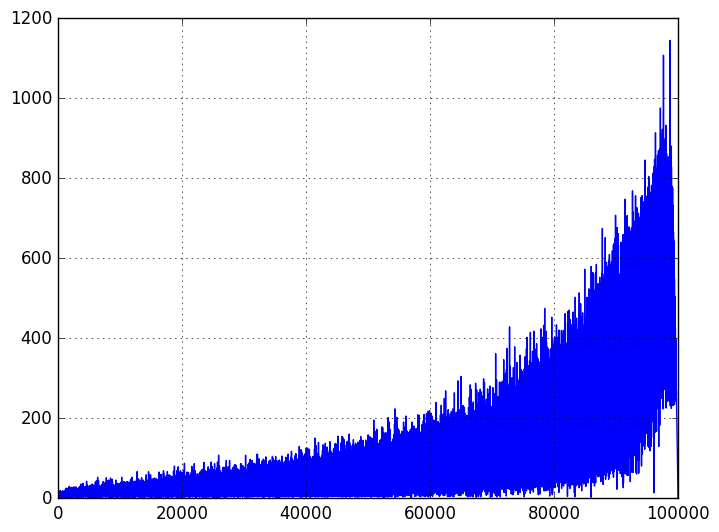

In [10]:
plot(1:n, degs)
grid("on")

In [11]:
degs = []
u = U.data
for i in 1:u.n
    push!(degs, log(nnz(u[:,i]) * (n - i)))
end

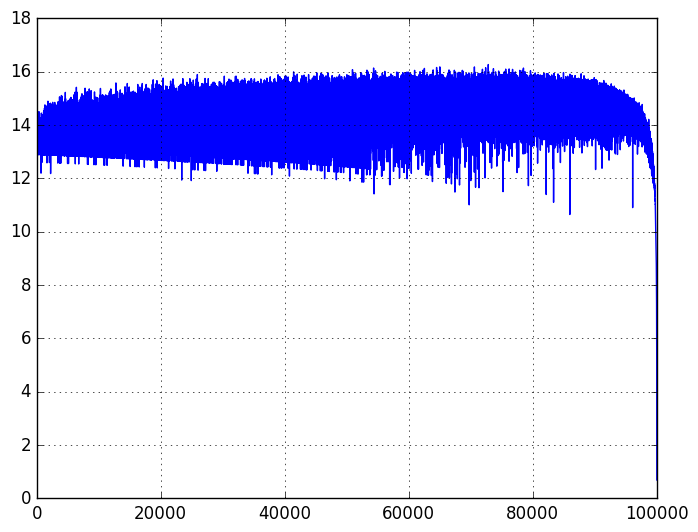

In [12]:
plot(1:n, degs)
grid("on")

# using a tree ordering

### Tree with old params

In [15]:
@time f,gOp,U,d = buildSolver(a[ord,ord], eps = 0.5, sampConst = 0.02);

181.550878 seconds (6.87 M allocations: 20.297 GB, 62.06% gc time)


In [16]:
@time checkError(gOp)

 15.774123 seconds (41.94 M allocations: 934.465 MB, 10.91% gc time)


0.45844477999059396

In [17]:
degs = []
u = U.data
for i in 1:u.n
    push!(degs, nnz(u[:,i]))
end

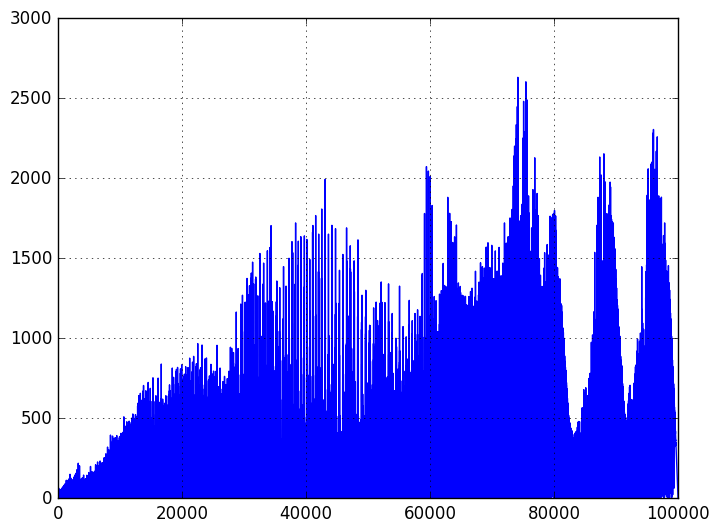

In [18]:
plot(1:n, degs)
grid("on")

In [19]:
degs = []
u = U.data
for i in 1:u.n
    push!(degs, log(nnz(u[:,i])))
end

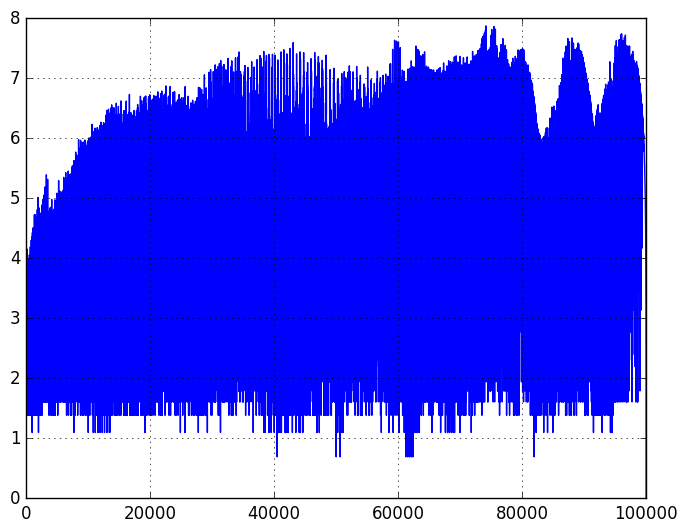

In [20]:
plot(1:n, degs)
grid("on")

In [21]:
degs = []
u = U.data
for i in 1:u.n
    push!(degs, log(nnz(u[:,i]) * (n - i)))
end

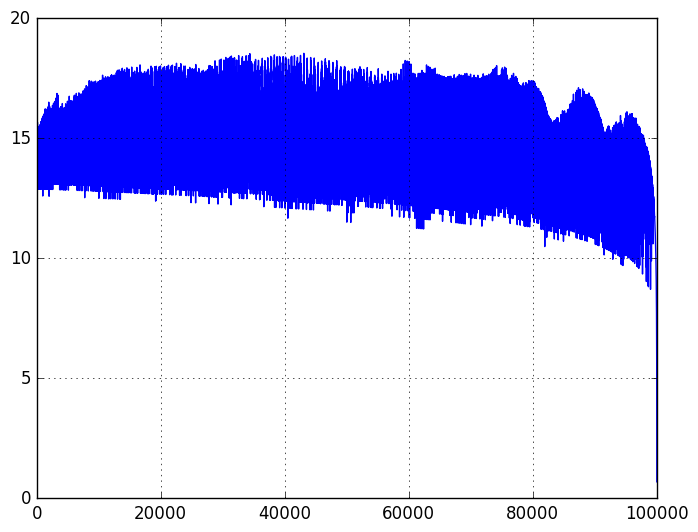

In [22]:
plot(1:n, degs)
grid("on")

### Tree with new params

In [23]:
@time f,gOp,U,d = buildSolver(a[ord,ord], eps = 0.5, sampConst = 0.006);

 40.894944 seconds (6.18 M allocations: 9.050 GB, 47.32% gc time)


In [24]:
@time checkError(gOp)

 12.919415 seconds (55.92 M allocations: 1.210 GB, 6.28% gc time)


0.8220367896183591

In [25]:
degs = []
u = U.data
for i in 1:u.n
    push!(degs, nnz(u[:,i]))
end

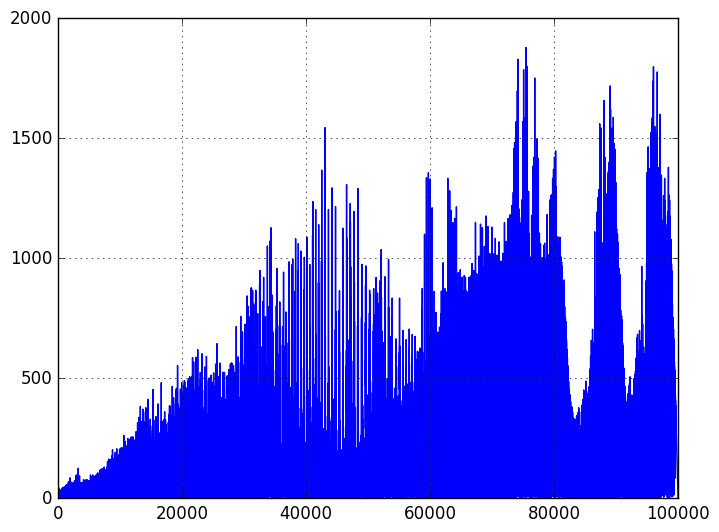

In [26]:
plot(1:n, degs)
grid("on")

In [27]:
degs = []
u = U.data
for i in 1:u.n
    push!(degs, log(nnz(u[:,i])))
end

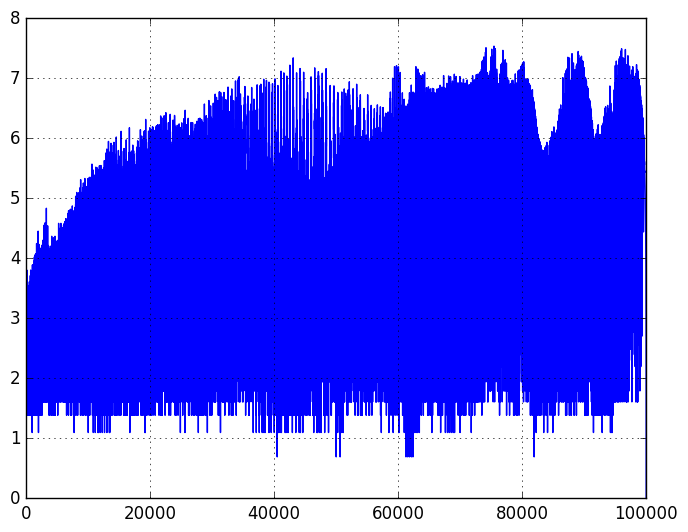

In [28]:
plot(1:n, degs)
grid("on")

In [29]:
degs = []
u = U.data
for i in 1:u.n
    push!(degs, log(nnz(u[:,i]) * (n - i)))
end

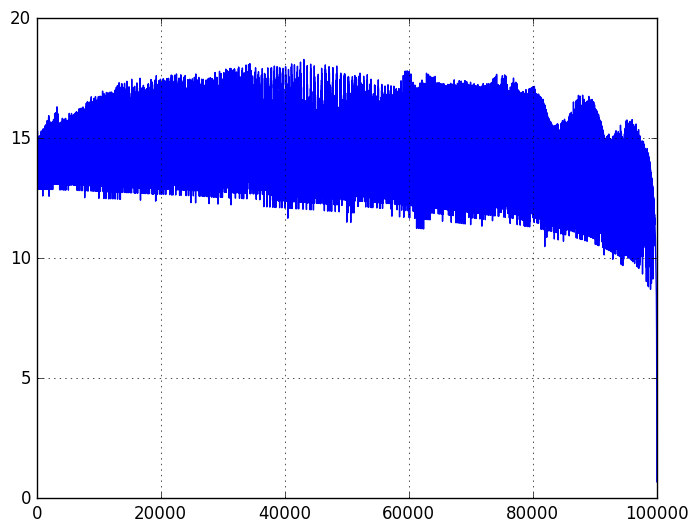

In [30]:
plot(1:n, degs)
grid("on")

## Let's try a random permutation, as a reality check

In [31]:
p = randperm(n);

In [32]:
@time f,gOp,U,d = buildSolver(a[p,p], eps = 0.5, sampConst = 0.02);

 30.324607 seconds (6.23 M allocations: 7.430 GB, 31.61% gc time)


In [33]:
@time checkError(gOp)

 11.801750 seconds (48.93 M allocations: 1.061 GB, 5.46% gc time)


0.5817153489384991

In [34]:
degs = []
u = U.data
for i in 1:u.n
    push!(degs, log(nnz(u[:,i]) * (n - i)))
end

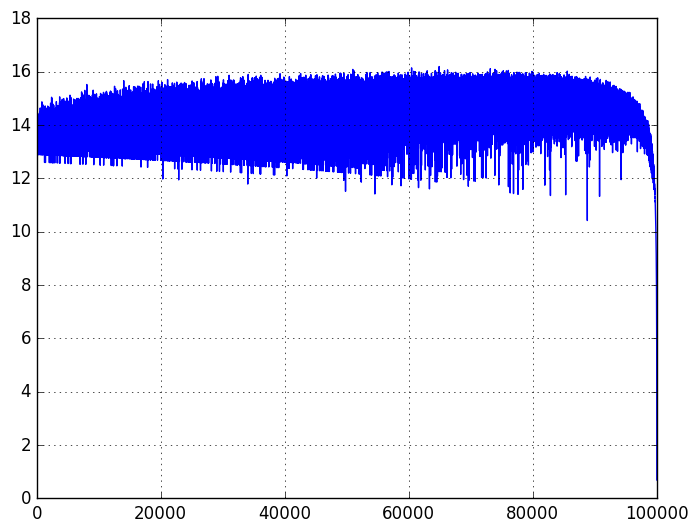

In [35]:
plot(1:n, degs)
grid("on")